# Predição de Valores de Carros Usados

## *Introdução*

Este projeto utiliza Machine Learning para prever os preços de carros usados com base em características como marca, ano de fabricação, tipo de combustível e quilometragem.
O Objetivo do projeto é auxiliar consumidores e vendedores a entenderem a dinâmica dos preços e a tomarem decisões informadas sobre compra e venda de carros usados nos Estados Unidos.


Os dados foram extraídos de um dataset contendo informações detalhadas sobre veículos.

---


## Ferramentas Utilizadas

- **Linguagem**: Python
- **Bibliotecas**:
  - Manipulação de Dados: `pandas`, `numpy`
  - Visualização: `matplotlib`, `seaborn`
  - Modelagem: `scikit-learn`

## *Exploração dos dados*

Inicialmente, vamos carregar algumas bibliotecas necessárias e o dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import pandas as pd
from google.colab import drive

import os
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

# carregando o dataset
# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho base (substitua pelo caminho da pasta onde o CSV está)
file_path = '/content/drive/MyDrive/Faculdade/8s/ML/data'

# Função para carregar o arquivo CSV
def load_data(car_path=file_path):
    # Caminho completo do arquivo CSV
    csv_path = os.path.join(car_path, "car_price_prediction.csv")  # Nome do seu arquivo CSV
    return pd.read_csv(csv_path)

# Carregando os dados
df = load_data()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Informações iniciais do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.shape

(19237, 18)

In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


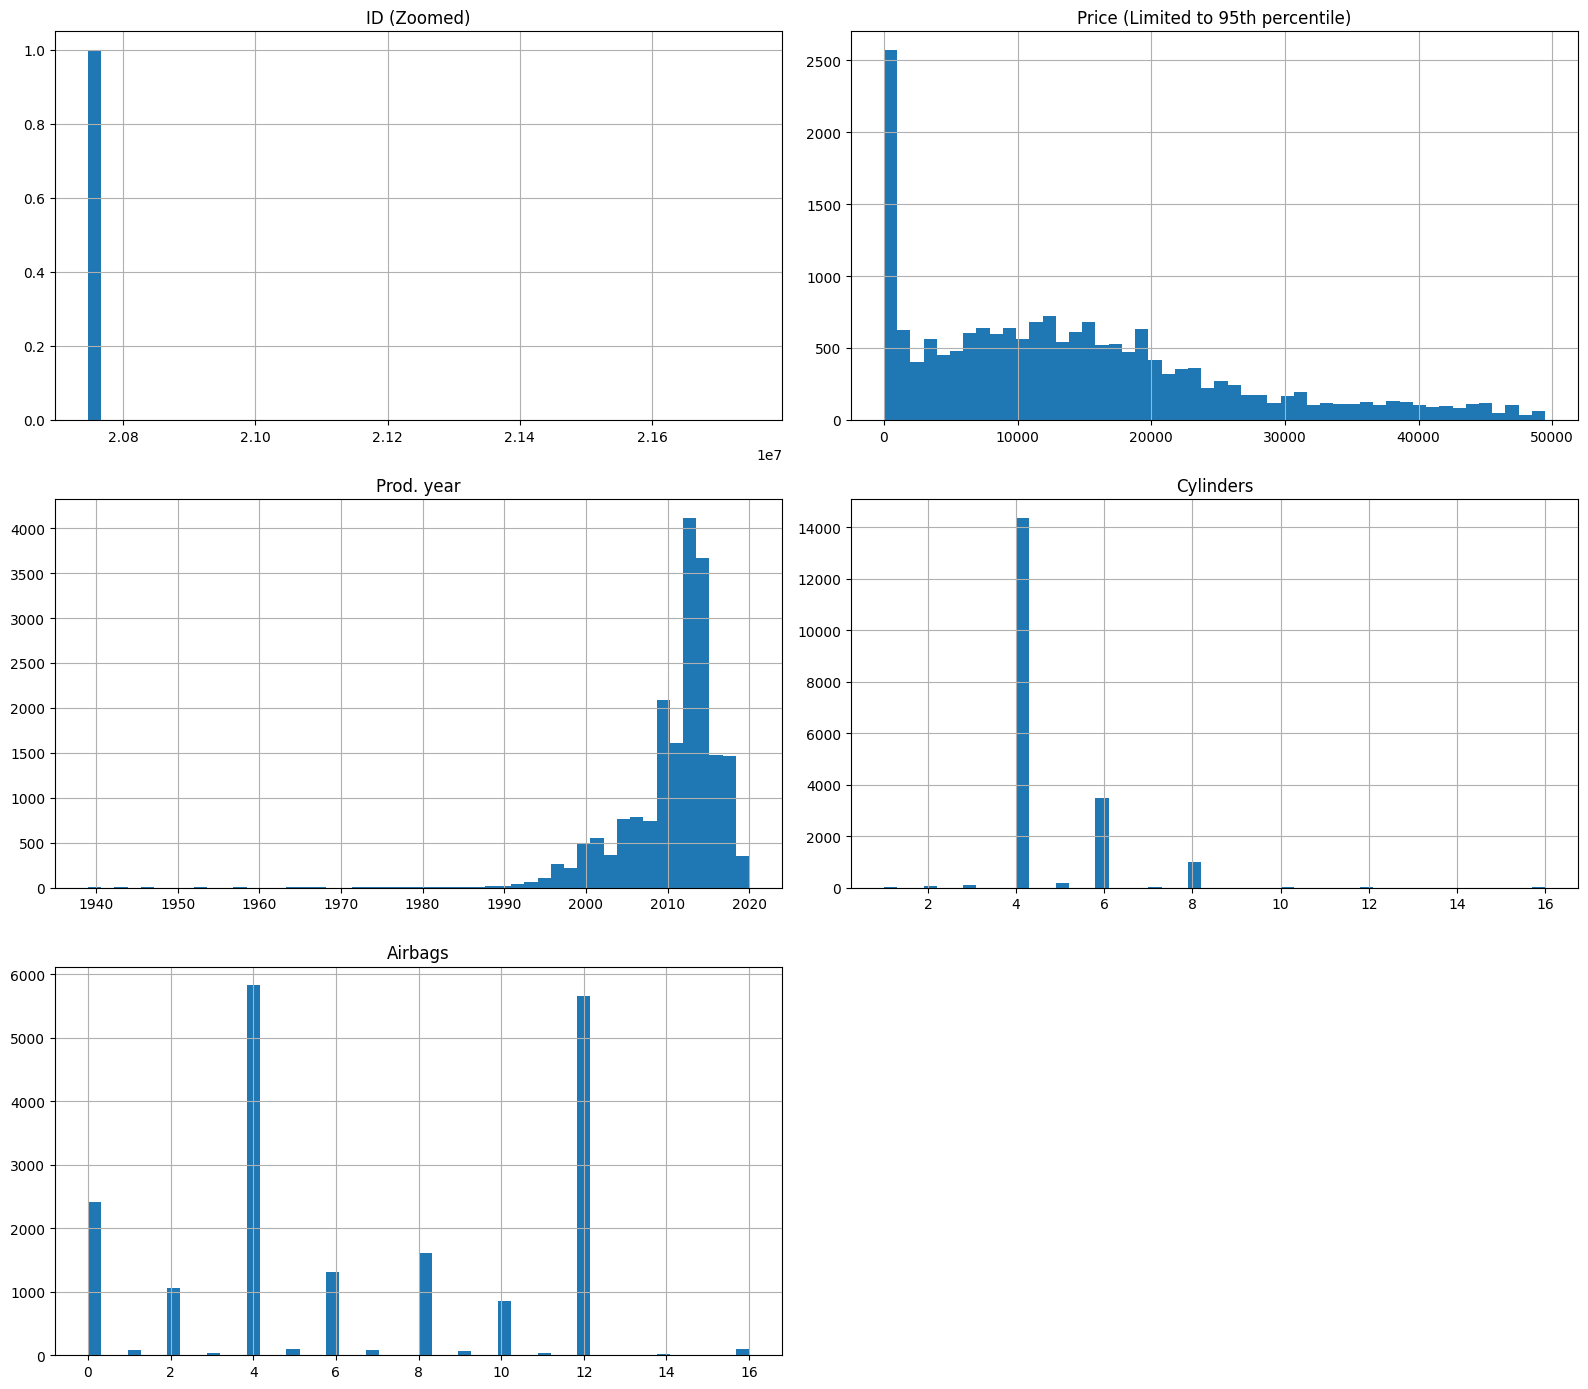

In [ ]:
import matplotlib.pyplot as plt

# Plotar histogramas ajustados para tornar "ID" e "Price" mais compreensíveis
fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# Alterando a variável de "columns" para "Columns"
Columns = ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
data = df[Columns]

for i, column in enumerate(Columns):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    if column == 'ID':
        ax.hist(data[column], bins=50, range=(data['ID'].min(), data['ID'].min() + 1e6))
        ax.set_title(f'{column} (Zoomed)')
    elif column == 'Price':
        ax.hist(data[column], bins=50, range=(0, data['Price'].quantile(0.95)))
        ax.set_title(f'{column} (Limited to 95th percentile)')
    else:
        ax.hist(data[column], bins=50)
        ax.set_title(column)

    ax.grid()

# Remover subplot vazio (se houver número ímpar de gráficos)
if len(Columns) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()


## Descrição do Dataset

O dataset inclui as seguintes colunas principais:

- **Price**: Preço do carro (variável alvo).
- **Levy**: Taxa associada ao veículo.
- **Manufacturer**: Fabricante do veículo.
- **Model**: Modelo do carro.
- **Prod. year**: Ano de fabricação.
- **Category**: Categoria do carro (Jeep, Hatchback, etc.).
- **Fuel type**: Tipo de combustível (Petrol, Hybrid, etc.).
- **Engine volume**: Volume do motor em litros.
- **Mileage**: Quilometragem (km).
- **Cylinders**: Número de cilindros.
- **Gear box type**: Tipo de câmbio (Automatic, Tiptronic, etc.).
- **Drive wheels**: Tipo de tração (4x4, Front, etc.).
- **Color**: Cor do veículo.
- **Airbags**: Número de airbags.

O dataset possui também 19237 linhas

---

Inicialmente, podemos dizer que o dataset é bem estruturado e com isso, podemos iniciar uma análise inicial.



## *Criando uma copia e iniciando a exploração incial*

- Primeiramente, criamos uma cópia do dataframe chamada "df_exp"
- Depois, removemos a coluna ID pois se torna irrelevante para o que queremos prever aqui
- Criamos uma variável de faixas de preço chamada "price_category" que servirá para a estratificação em faixas de preços que iremos fazer

In [ ]:
# Ajustando o código para usar "df_exp" ao invés de "df_exploracao"

# Criar uma cópia do dataset para exploração
df_exp = df.copy()

# Remover a coluna ID, pois não é relevante para a predição
if 'ID' in df_exp.columns:
    df_exp.drop('ID', axis=1, inplace=True)

# Convertendo a coluna 'Mileage' para um formato numérico (removendo ' km')
df_exp["Mileage"] = df_exp["Mileage"].str.replace(" km", "").astype(float)

# Criar uma variável de faixas de preço para estratificação
df_exp["price_category"] = pd.cut(df_exp["Price"],
                                  bins=[0, 5000, 15000, 30000, 50000, float('inf')],
                                  labels=[1, 2, 3, 4, 5])  # 5 categorias de preço


## Dividindo a cópia do dataset em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Criando um split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Dividir os dados mantendo a proporção das categorias de preço
for train_index, test_index in split.split(df_exp, df_exp["price_category"]):
    strat_train_set = df_exp.loc[train_index]
    strat_test_set = df_exp.loc[test_index]

# Remover a coluna de categorização após o split
strat_train_set = strat_train_set.drop("price_category", axis=1)
strat_test_set = strat_test_set.drop("price_category", axis=1)

# Exibir a distribuição das faixas de preço no treino e teste
print("Distribuição de preços no conjunto de treino:")
print(strat_train_set["Price"].value_counts())

print("\nDistribuição de preços no conjunto de teste:")
print(strat_test_set["Price"].value_counts())




Distribuição de preços no conjunto de treino:
Price
470      226
15681    223
14113    206
392      202
314      192
        ... 
11900      1
31650      1
31245      1
60684      1
46891      1
Name: count, Length: 2066, dtype: int64

Distribuição de preços no conjunto de teste:
Price
15681    57
10976    51
7840     51
12544    50
470      48
         ..
16041     1
36539     1
36692     1
43000     1
16408     1
Name: count, Length: 978, dtype: int64


## *Visualizando os Dados*

Antes de prosseguir com a modelagem, é essencial entender a estrutura do dataset. Nesta seção, analisamos os tipos de atributos presentes, identificamos variáveis categóricas e numéricas e verificamos possíveis inconsistências nos dados. Essa visualização inicial nos ajuda a definir quais transformações serão necessárias no pré-processamento e a garantir que as informações estejam formatadas corretamente para os modelos de Machine Learning.


Tipos de atributos

In [ ]:
strat_train_set.dtypes

,0
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,object
Mileage,float64


## Estudo dos Atributos e Suas Propriedades

| **Atributo**          | **Tipo**                | **Propriedades**                                      |
|------------------------|-------------------------|------------------------------------------------------|
| **Price**             | Numérico (`int`), bounded | Variável de saída (target).                          |
| **Levy**              | Texto ou categórico     | Pode conter valores ausentes ou não numéricos.       |
| **Manufacturer**      | Categórico              | Marca do carro (nominal).                            |
| **Model**             | Texto ou categórico     | Nome do modelo do carro.                             |
| **Prod. year**        | Numérico (`int`), bounded | Ano de produção.                                     |
| **Category**          | Categórico              | Tipo de carro (ex.: SUV, Sedan).                     |
| **Leather interior**  | Categórico binário      | Indica presença de interior de couro.                |
| **Fuel type**         | Categórico              | Tipo de combustível (ex.: gasolina, diesel).         |
| **Engine volume**     | Texto ou numérico       | Inclui valores como "2.0" ou "3.5 Turbo".            |
| **Mileage**           | Texto estruturado       | Quilometragem (ex.: "150,000 km").                   |
| **Cylinders**         | Numérico (`float`), bounded | Número de cilindros.                                 |
| **Gear box type**     | Categórico              | Tipo de transmissão (ex.: manual, automático).       |
| **Drive wheels**      | Categórico              | Tipo de tração (ex.: traseira, AWD).                 |
| **Doors**             | Texto ou categórico     | Número de portas.                                    |
| **Wheel**             | Categórico binário      | Posição do volante (ex.: "Left", "Right").           |
| **Color**             | Categórico              | Cor do carro.                                        |
| **Airbags**           | Numérico (`int`), bounded | Quantidade de airbags.                               |



## % de valores ausentes

In [ ]:
valores_ausentes = strat_train_set.isnull().mean() * 100
print(valores_ausentes)

Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64


A verificação da porcentagem de valores ausentes é uma etapa fundamental no pré-processamento dos dados. Neste caso, observamos que todas as colunas possuem **0% de valores ausentes**, indicando que o dataset está completo e não há necessidade de imputação ou remoção de registros. Isso facilita a modelagem, evitando a introdução de viés causado por preenchimentos artificiais ou perda de informações relevantes.


## Realizando uma análise da coluna 'Price'

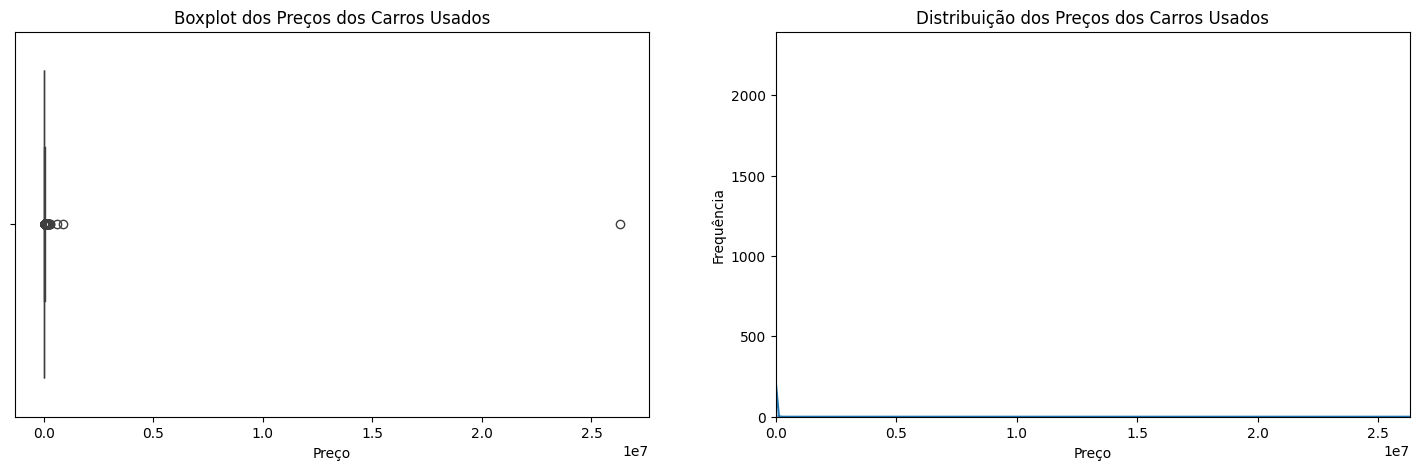

In [ ]:
# Importar bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar a distribuição da coluna 'Price'
plt.figure(figsize=(18, 5))

# Histograma da distribuição dos preços
plt.subplot(1, 2, 2)
sns.histplot(strat_train_set['Price'], kde=True)
plt.title('Distribuição dos Preços dos Carros Usados')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.xlim(0, strat_train_set['Price'].max())

# Boxplot dos preços
plt.subplot(1, 2, 1)
sns.boxplot(x='Price', data=strat_train_set)
plt.title('Boxplot dos Preços dos Carros Usados')
plt.xlabel('Preço')

# Mostrar os gráficos
plt.show()


Nesta etapa, analisamos a distribuição dos preços dos carros usados, nossa variável alvo. O **boxplot** revela a presença de **outliers**, indicando que alguns veículos possuem preços significativamente mais altos do que a maioria dos dados. A distribuição também mostra uma concentração de valores próximos ao início do eixo, reforçando a necessidade de um tratamento adequado para evitar que esses valores extremos impactem negativamente o desempenho dos modelos.

Para garantir uma modelagem mais robusta e evitar viés, realizaremos uma limpeza dos dados, removendo ou tratando esses outliers antes do treinamento dos modelos.


## agrupando agora as marcas de carro com suas categorias

<Figure size 1400x800 with 0 Axes>

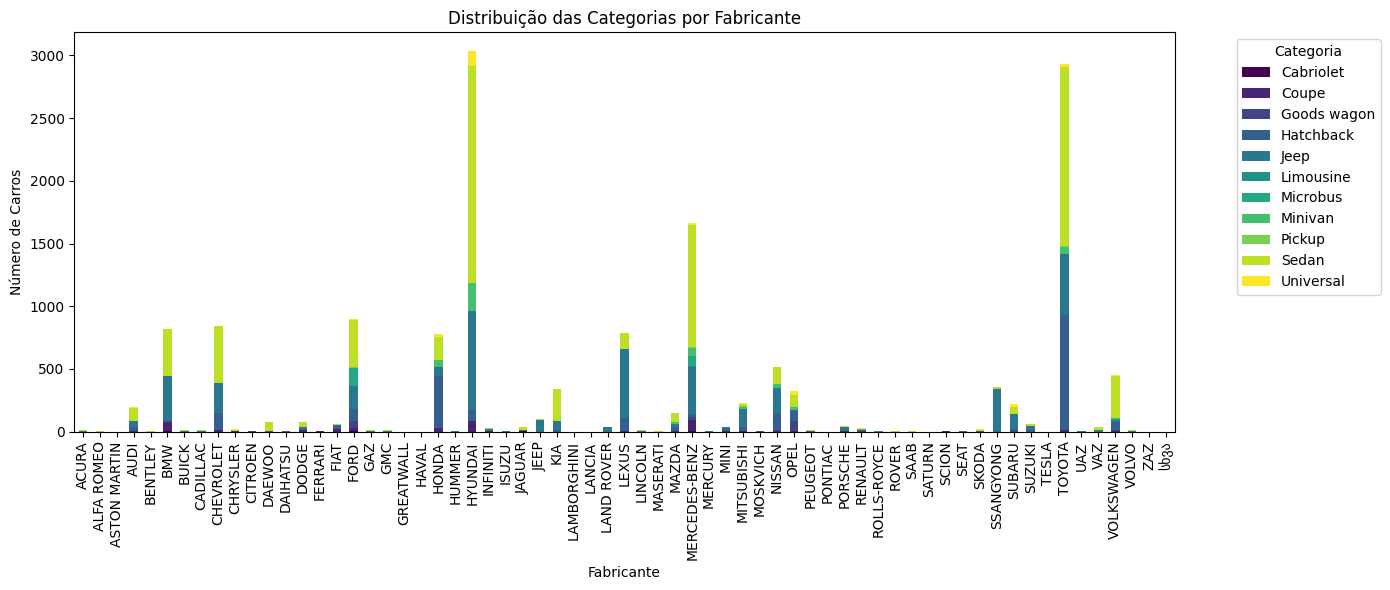

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma tabela de contingência para contar quantas categorias cada fabricante possui
df_grouped = strat_train_set.groupby(['Manufacturer', 'Category']).size().unstack()

# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Criar um gráfico de barras empilhadas
df_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))

# Personalizar o gráfico
plt.title('Distribuição das Categorias por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Número de Carros')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Girar os rótulos do eixo X para melhor leitura

# Exibir o gráfico
plt.tight_layout()
plt.show()


O gráfico acima mostra a relação entre os **fabricantes de automóveis** e as **categorias de veículos**, ajudando a identificar quais tipos de carros cada marca produz com mais frequência. As barras representam o número total de carros por fabricante, enquanto as cores indicam as diferentes categorias.

### **Observações:**
- Algumas marcas, como **Toyota e Hyundai**, possuem uma grande variedade de categorias, enquanto outras, como **Ferrari e Lamborghini**, concentram-se em poucas categorias específicas.
- A categoria **Sedan** parece ser a mais frequente em diversos fabricantes, sugerindo que é um tipo de carro amplamente produzido e ofertado no mercado.
- Marcas com menor presença no dataset apresentam um número limitado de categorias.


## Distribuição de Preços por Fabricante  

Nesta análise, exploramos a **variação dos preços dos veículos por fabricante**. Utilizando um **boxplot**, conseguimos visualizar a mediana, a dispersão dos preços e possíveis diferenças entre as marcas. Essa informação ajuda a entender como o **fabricante impacta o valor dos carros** no mercado.  


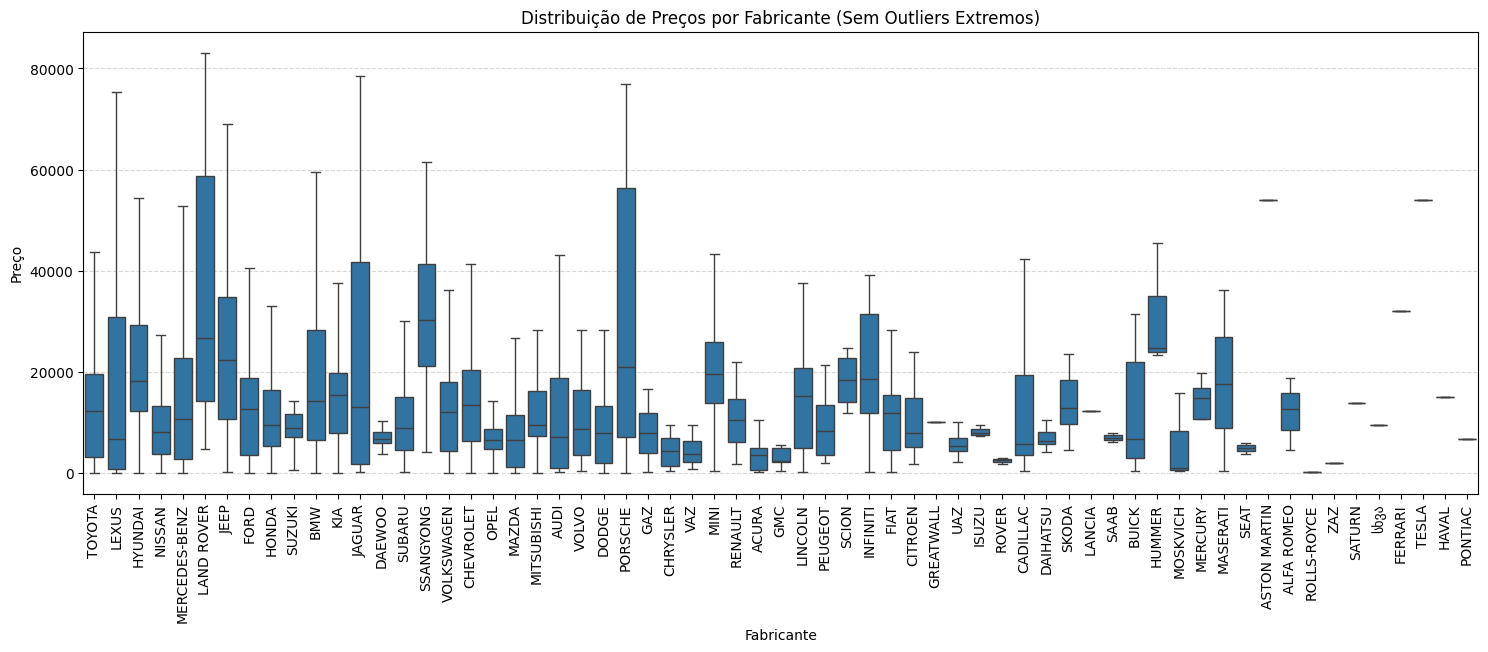

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Criando cópia do dataframe para evitar alterações no original
df_viz = strat_train_set.copy()

# Remover outliers extremos no preço para melhor visualização
df_viz = df_viz[df_viz['Price'] < df_viz['Price'].quantile(0.99)]

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_viz, x='Manufacturer', y='Price', showfliers=False)  # Oculta outliers extremos
plt.xticks(rotation=90)
plt.title('Distribuição de Preços por Fabricante (Sem Outliers Extremos)')
plt.xlabel('Fabricante')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



 - Observamos que há **variação significativa de preços entre os fabricantes**, indicando que a marca do veículo é um fator relevante na precificação.  
- Algumas marcas possuem uma **faixa de preços mais concentrada**, enquanto outras apresentam **distribuições mais amplas**, sugerindo diferentes segmentos de mercado.  
- Modelos de marcas premium, como **Porsche, Rolls-Royce e Ferrari**, tendem a ter preços médios mais elevados.  


## Distribuição dos Tipos de Câmbio  

Nesta análise, exploramos a **frequência dos diferentes tipos de câmbio** nos veículos do dataset. O gráfico de barras exibe quais tipos de transmissão são mais comuns, ajudando a entender a **preferência do mercado** e possíveis impactos no preço dos carros.  


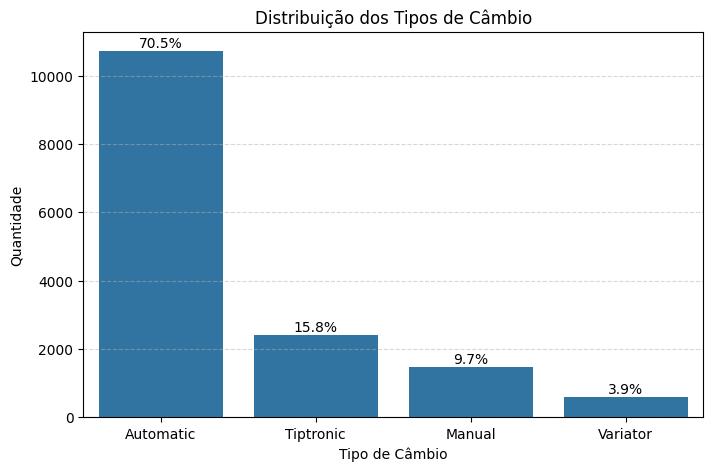

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_viz, x='Gear box type', order=df_viz['Gear box type'].value_counts().index)
plt.title('Distribuição dos Tipos de Câmbio')
plt.xlabel('Tipo de Câmbio')
plt.ylabel('Quantidade')

# Adicionar porcentagens acima das barras
total = len(df_viz)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




- A maioria dos veículos no dataset possui **câmbio automático (70.5%)**, sugerindo uma preferência por esse tipo de transmissão.  
- O **câmbio Tiptronic (15.8%)** é o segundo mais comum, enquanto os **manuais (9.7%)** representam uma parcela menor do mercado.  
- O tipo **Variator (3.9%)** é o menos frequente, o que pode indicar que é uma tecnologia menos adotada pelos fabricantes.   


## Relação entre Quilometragem e Preço  

Este gráfico de dispersão analisa a **influência da quilometragem no preço dos veículos**. A linha de tendência indica se há uma correlação entre esses dois fatores, ajudando a entender o impacto do uso do carro em sua desvalorização.  


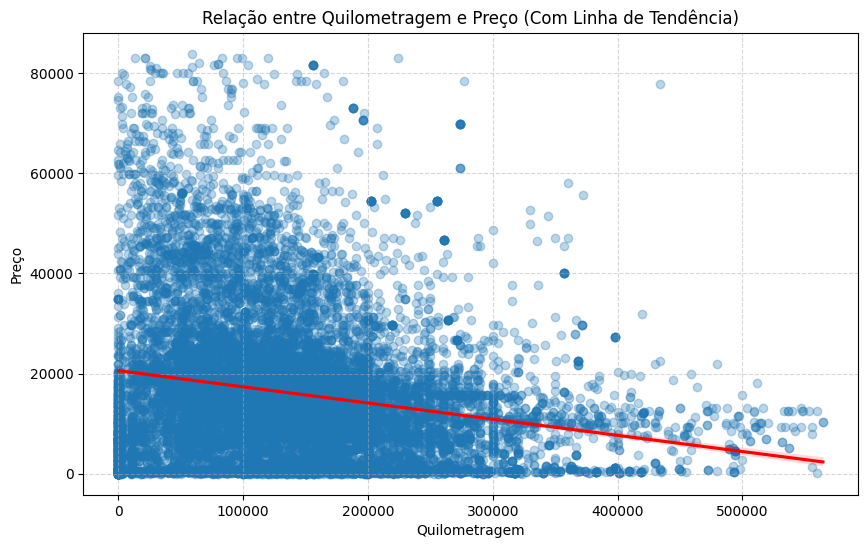

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar uma cópia do dataframe para evitar alterações no original
df_viz = strat_train_set.copy()

# Remover outliers extremos em 'Mileage' e 'Price' (acima do percentil 99)
df_viz = df_viz[(df_viz['Mileage'] < df_viz['Mileage'].quantile(0.99)) &
                (df_viz['Price'] < df_viz['Price'].quantile(0.99))]

# Criar gráfico de dispersão com melhor visualização
plt.figure(figsize=(10, 6))
sns.regplot(data=df_viz, x='Mileage', y='Price', scatter_kws={'alpha': 0.3}, line_kws={"color": "red"})
plt.title('Relação entre Quilometragem e Preço (Com Linha de Tendência)')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

- Como esperado, existe uma **correlação negativa** entre **quilometragem** e **preço** dos veículos: **quanto maior a quilometragem, menor o preço**.
- A linha de tendência indica que a **desvalorização do veículo** ocorre de forma consistente com o aumento da quilometragem, mas com grande variação nos preços.
- Alguns veículos com alta quilometragem ainda apresentam **preços elevados**, o que pode ser explicado por outros fatores, como a **marca** ou **estado de conservação**.

## Análise da Distribuição das Variáveis Numéricas

Para entender melhor a distribuição dos dados antes do pré-processamento, realizamos uma análise exploratória das principais **variáveis numéricas** do dataset. Isso nos permite visualizar padrões, identificar possíveis **valores discrepantes (outliers)** e compreender a variação de cada atributo.

### **O que será feito?**
- Criamos uma **cópia do dataset** para garantir que o original permaneça inalterado.
- **Convertimos a coluna `'Levy'` para numérica**, substituindo valores não numéricos por `NaN` e imputando valores ausentes com a média.
- Selecionamos apenas os **atributos numéricos** relevantes.
- Removemos **outliers** de algumas variáveis, como **'Price'**, para melhorar a visualização.
- Geramos **histogramas** para visualizar a distribuição de cada variável.


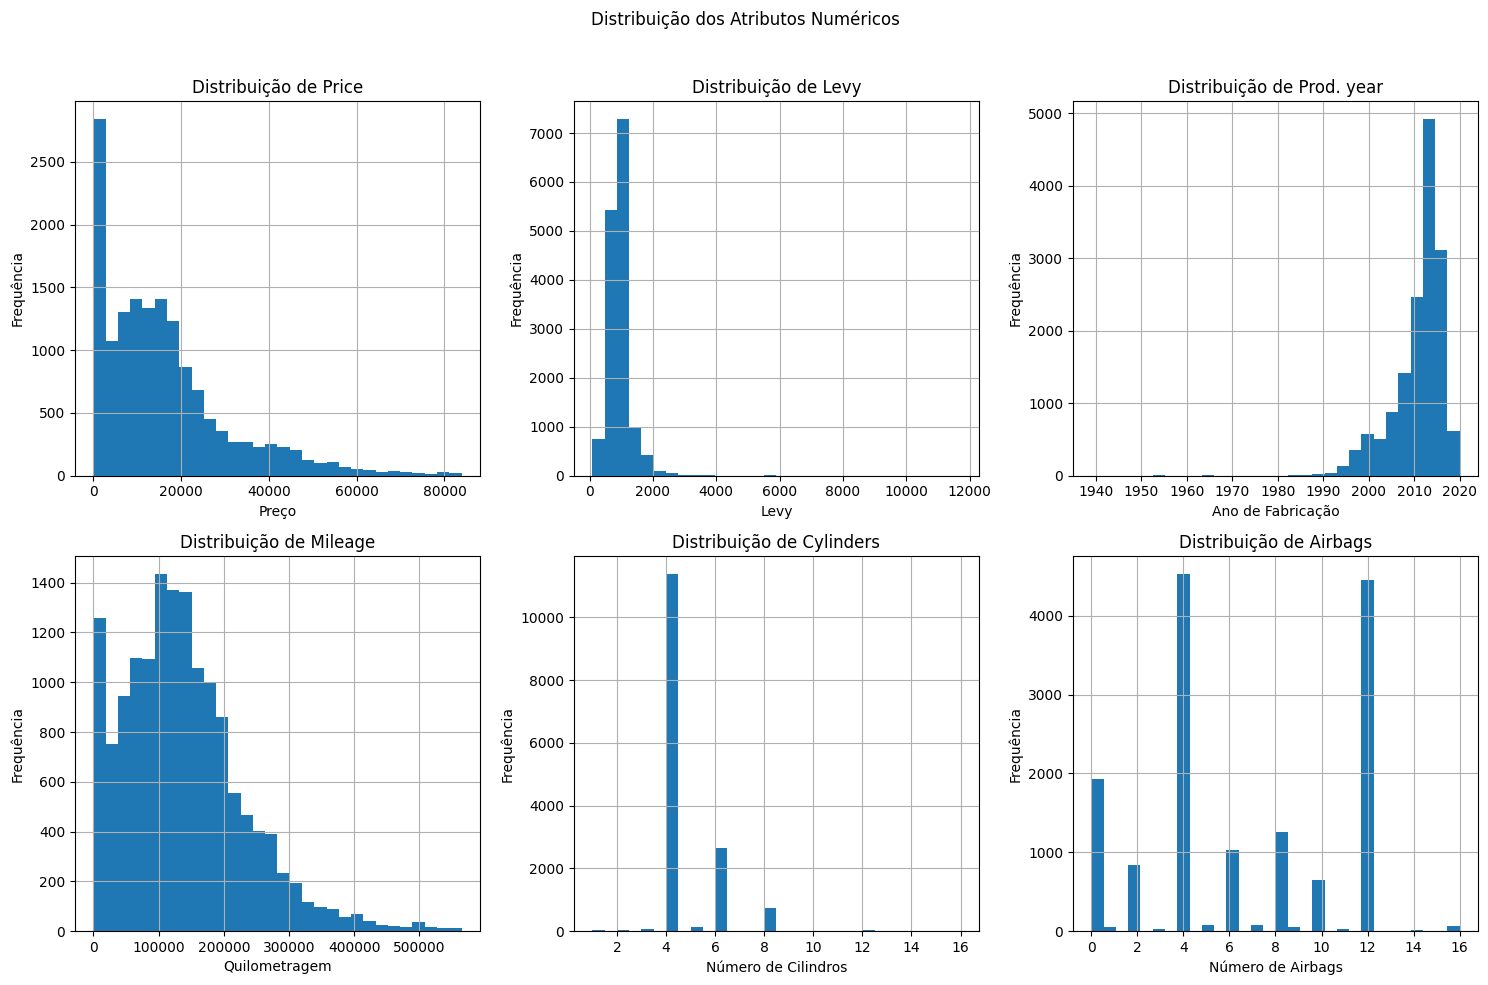

In [ ]:
import matplotlib.pyplot as plt

# Usar a cópia já limpa (df_viz) para visualização
df_viz = df_viz[['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']]

# Converter a coluna 'Levy' para numérico, tratando valores não numéricos como NaN
df_viz['Levy'] = pd.to_numeric(df_viz['Levy'], errors='coerce')

# Substituir os valores NaN de Levy com a média ou outra estratégia de imputação
df_viz['Levy'].fillna(df_viz['Levy'].mean(), inplace=True)

# Criar a figura para visualização das distribuições
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df_viz['Price'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Price')
axes[0, 0].set_xlabel('Preço')
axes[0, 0].set_ylabel('Frequência')

df_viz['Levy'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Levy')
axes[0, 1].set_xlabel('Levy')
axes[0, 1].set_ylabel('Frequência')

df_viz['Prod. year'].hist(bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribuição de Prod. year')
axes[0, 2].set_xlabel('Ano de Fabricação')
axes[0, 2].set_ylabel('Frequência')

df_viz['Mileage'].hist(bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Mileage')
axes[1, 0].set_xlabel('Quilometragem')
axes[1, 0].set_ylabel('Frequência')

df_viz['Cylinders'].hist(bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Cylinders')
axes[1, 1].set_xlabel('Número de Cilindros')
axes[1, 1].set_ylabel('Frequência')

df_viz['Airbags'].hist(bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribuição de Airbags')
axes[1, 2].set_xlabel('Número de Airbags')
axes[1, 2].set_ylabel('Frequência')

plt.suptitle('Distribuição dos Atributos Numéricos')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Conclusões sobre a Distribuição das Variáveis Numéricas

Os histogramas acima mostram a distribuição das principais **variáveis numéricas** do dataset. Essa análise nos permite identificar padrões, tendências e possíveis problemas nos dados, além de oferecer insights importantes para a modelagem.

### **Principais Observações:**
- **Presença de Outliers:**
  - As variáveis **Price, Levy e Mileage** apresentam valores extremos, especialmente após a conversão de `'Levy'` para numérico. Esses outliers podem impactar a modelagem, e sua remoção ou imputação é crucial para evitar distorções nos resultados dos modelos de Machine Learning.
  
- **Distribuição Assimétrica:**
  - As variáveis **Price e Levy** possuem distribuições com uma concentração em valores mais baixos, sugerindo uma grande quantidade de veículos com preços mais acessíveis e **taxas** mais baixas.
  - A variável **Mileage** apresenta uma grande concentração de quilometragem baixa, mas também possui **valores excessivamente altos**, indicando possíveis erros ou carros com quilometragem fora da realidade.

- **Ano de Fabricação (`Prod. year`)**  
  - A maioria dos veículos foi fabricada nos **últimos anos**, sugerindo uma predominância de carros mais novos no dataset, o que pode impactar o modelo dependendo da distribuição real de idade dos veículos.

- **Número de Cilindros e Airbags**  
  - A distribuição dessas variáveis indica que **4 cilindros** e **12 airbags** são comuns nos carros do dataset, possivelmente refletindo tendências e preferências do mercado atual, o que pode ser útil para prever o tipo de veículo.

## Matriz de Correlação entre os Atributos Numéricos

Nesta etapa, analisamos a **correlação entre as variáveis numéricas** do dataset. A matriz de correlação nos ajuda a identificar quais atributos possuem **relações fortes entre si**, permitindo uma melhor seleção de features e evitando redundância nos modelos.


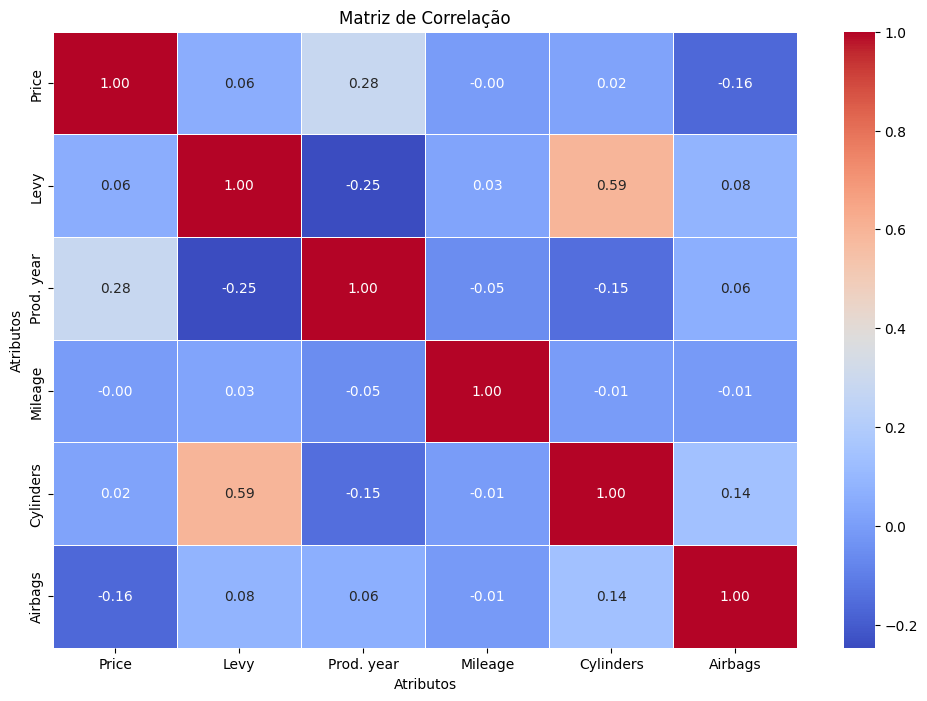

In [ ]:
# Visualizar a correlação entre os atributos numéricos
correlacao = df_viz.corr()
plt.figure(figsize=(12, 8))
plt.title('Matriz de Correlação')
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Atributos')
plt.ylabel('Atributos')
plt.show()

# Identificar pares de atributos com alta correlação (acima de 0.8 ou abaixo de -0.8)
alta_correlacao = correlacao[(correlacao > 0.8) | (correlacao < -0.8)]

A matriz de correlação acima nos permite identificar **relações entre as variáveis numéricas** do dataset. Algumas observações importantes:

- **A variável 'Price' não apresenta correlação forte com nenhuma variável numérica**, sugerindo que outros fatores (como características categóricas) podem ser mais relevantes para prever o preço dos carros.
- **'Cylinders' e 'Levy' possuem uma correlação moderada (0.59)**, indicando que veículos com motores mais potentes podem ter taxas mais altas.
- **'Mileage' e 'Price' possuem uma correlação praticamente nula (~0.00)**, o que pode indicar que a quilometragem isoladamente não é um fator determinante para o preço.



Vamos relacionar o 'Prod. year' com 'Price', diferenciando por 'Fuel type' (Tipo de combustível)

## Relação entre Preço, Ano de Fabricação e Tipo de Combustível  

Nesta etapa, analisamos como o **ano de fabricação** influencia o **preço dos veículos**, diferenciando os dados pelo **tipo de combustível**. Essa visualização nos ajuda a identificar tendências no mercado e possíveis diferenças de valorização entre combustíveis.  


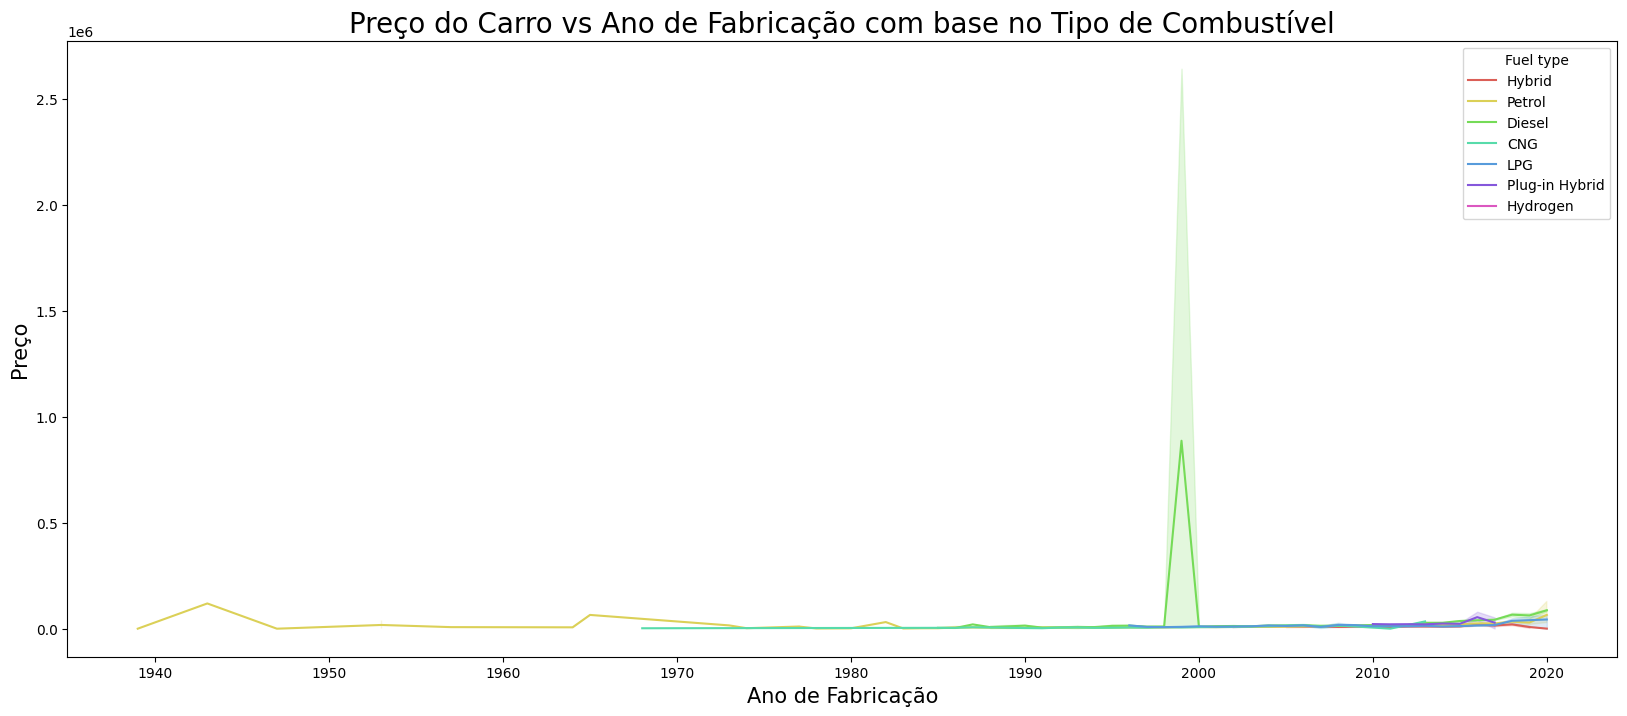

In [ ]:
# Escolher atributos relevantes para uma visualização similar

plt.figure(figsize=(20, 8))

sns.lineplot(data=strat_train_set, x='Prod. year', y='Price', hue='Fuel type', palette='hls')

# Configurar título e rótulos
plt.title('Preço do Carro vs Ano de Fabricação com base no Tipo de Combustível', fontsize=20)
plt.xlabel('Ano de Fabricação', fontsize=15)
plt.ylabel('Preço', fontsize=15)

# Exibir o gráfico
plt.show()


O gráfico acima mostra a variação do **preço dos veículos ao longo dos anos de fabricação**, diferenciando-os pelo **tipo de combustível**.  

### **Principais Observações:**  
- Há um **pico atípico em torno dos anos 2000**, possivelmente causado por **outliers** ou registros incorretos no dataset.  
- No geral, os preços parecem **aumentar levemente para veículos mais novos**, o que é esperado.  
- Diferentes tipos de combustível apresentam variações similares ao longo do tempo, sem uma distinção clara entre os grupos.  

### **Próximos Passos:**  
- **Investigar os outliers** identificados no gráfico para verificar sua influência na modelagem.  
- Aplicar técnicas de **tratamento de dados** para garantir que a análise não seja distorcida por valores anômalos.  


## *Preparação dos dados e limpeza*

In [ ]:
# Função para limpeza de dados e remoção de outliers
def clean_data(df):
    df = df.copy()  # Criar uma cópia para evitar alterações no original

    # Converter colunas numéricas para formato adequado
    df["Mileage"] = df["Mileage"].astype(str).str.replace(" km", "").astype(float)  # Garantir que 'Mileage' seja string
    df["Levy"] = df["Levy"].replace("-", "0").astype(float)

    # Remover outliers evidentes
    df = df[df["Prod. year"] >= 1980]  # Removendo veículos fabricados antes de 1980

    # Remover outliers baseados no preço (assumindo valores extremamente altos como outliers)
    df = df[df["Price"] > 100]  # Remover preços irreais muito baixos
    df = df[df["Price"] < df["Price"].quantile(0.99)]  # Remover os 1% valores mais altos

    return df

# Aplicar a função de limpeza ao dataset original
df_exp = clean_data(df_exp)


In [ ]:
# Recarregar as bibliotecas após o reset do ambiente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Função de pré-processamento para garantir a compatibilidade com o pipeline
def preprocessing(df):
    df = df.copy()

    # Converter colunas binárias em valores numéricos
    df["Leather interior"] = df["Leather interior"].replace({'Yes': 1, 'No': 0}).astype(int)
    df["Wheel"] = df["Wheel"].replace({'Left wheel': 0, 'Right-hand drive': 1}).astype(int)

    # Converter "Doors" para numérico, garantindo que esteja como int
    df["Doors"] = df["Doors"].str.extract('(\d+)').astype(float).astype('Int64')

    # Conversão correta de `ord__Doors` para inteiro
    if "Doors" in df.columns:
        df["Doors"] = df["Doors"].astype("Int64")  # Converter para inteiro adequado

    # Separar "Engine volume" em duas colunas: volume e turbo
    df["Turbo"] = df["Engine volume"].str.contains("Turbo", na=False).astype(int)
    df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "", regex=True).astype(float)

    # Codificar "Manufacturer" e "Model" com LabelEncoder
    encoder_manufacturer = LabelEncoder()
    encoder_model = LabelEncoder()
    df["Manufacturer"] = encoder_manufacturer.fit_transform(df["Manufacturer"])
    df["Model"] = encoder_model.fit_transform(df["Model"])

    return df

# Aplicar a função de pré-processamento no conjunto de treino
df_preprocessed = preprocessing(df_exp)

# Definir atributos numéricos, categóricos e ordinais após pré-processamento
num_attribs = ["Levy", "Prod. year", "Mileage", "Cylinders", "Airbags"]
cat_attribs = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Color"]  # Mantendo categorias antes de OHE
ord_attribs = ["Doors", "Turbo"]

# Criar pipeline de pré-processamento ajustado
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),  # Normalização dos atributos numéricos
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),  # One-Hot Encoding para categóricos
    ("ord", OrdinalEncoder(categories=[[2, 3, 4, 5], [0, 1]]), ord_attribs),  # Codificação ordinal
])

# Aplicar o pipeline ao conjunto de treino
strat_train_set_prepared = full_pipeline.fit_transform(df_preprocessed)

# Criar um DataFrame com os dados transformados
strat_train_set_prepared_df = pd.DataFrame(
    strat_train_set_prepared.toarray(),  # Converter matriz esparsa em array denso
    columns=full_pipeline.get_feature_names_out()  # Obter os nomes das colunas geradas pelo pipeline
)

# Exibir os dados originais e os dados transformados
print(df_preprocessed.tail())
print('-/-' * 50)
print(strat_train_set_prepared_df.tail())


       Price    Levy  Manufacturer  Model  Prod. year Category  \
19232   8467     0.0            34    369        1999    Coupe   
19233  15681   831.0            22   1286        2011    Sedan   
19234  26108   836.0            22   1391        2010     Jeep   
19235   5331  1288.0             7    439        2007     Jeep   
19236    470   753.0            22   1286        2012    Sedan   

       Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
19232                 1       CNG            2.0  300000.0        4.0   
19233                 1    Petrol            2.4  161600.0        4.0   
19234                 1    Diesel            2.0  116365.0        4.0   
19235                 1    Diesel            2.0   51258.0        4.0   
19236                 1    Hybrid            2.4  186923.0        4.0   

      Gear box type Drive wheels  Doors  Wheel   Color  Airbags  \
19232        Manual         Rear      2      0  Silver        5   
19233     Tiptronic        Fro

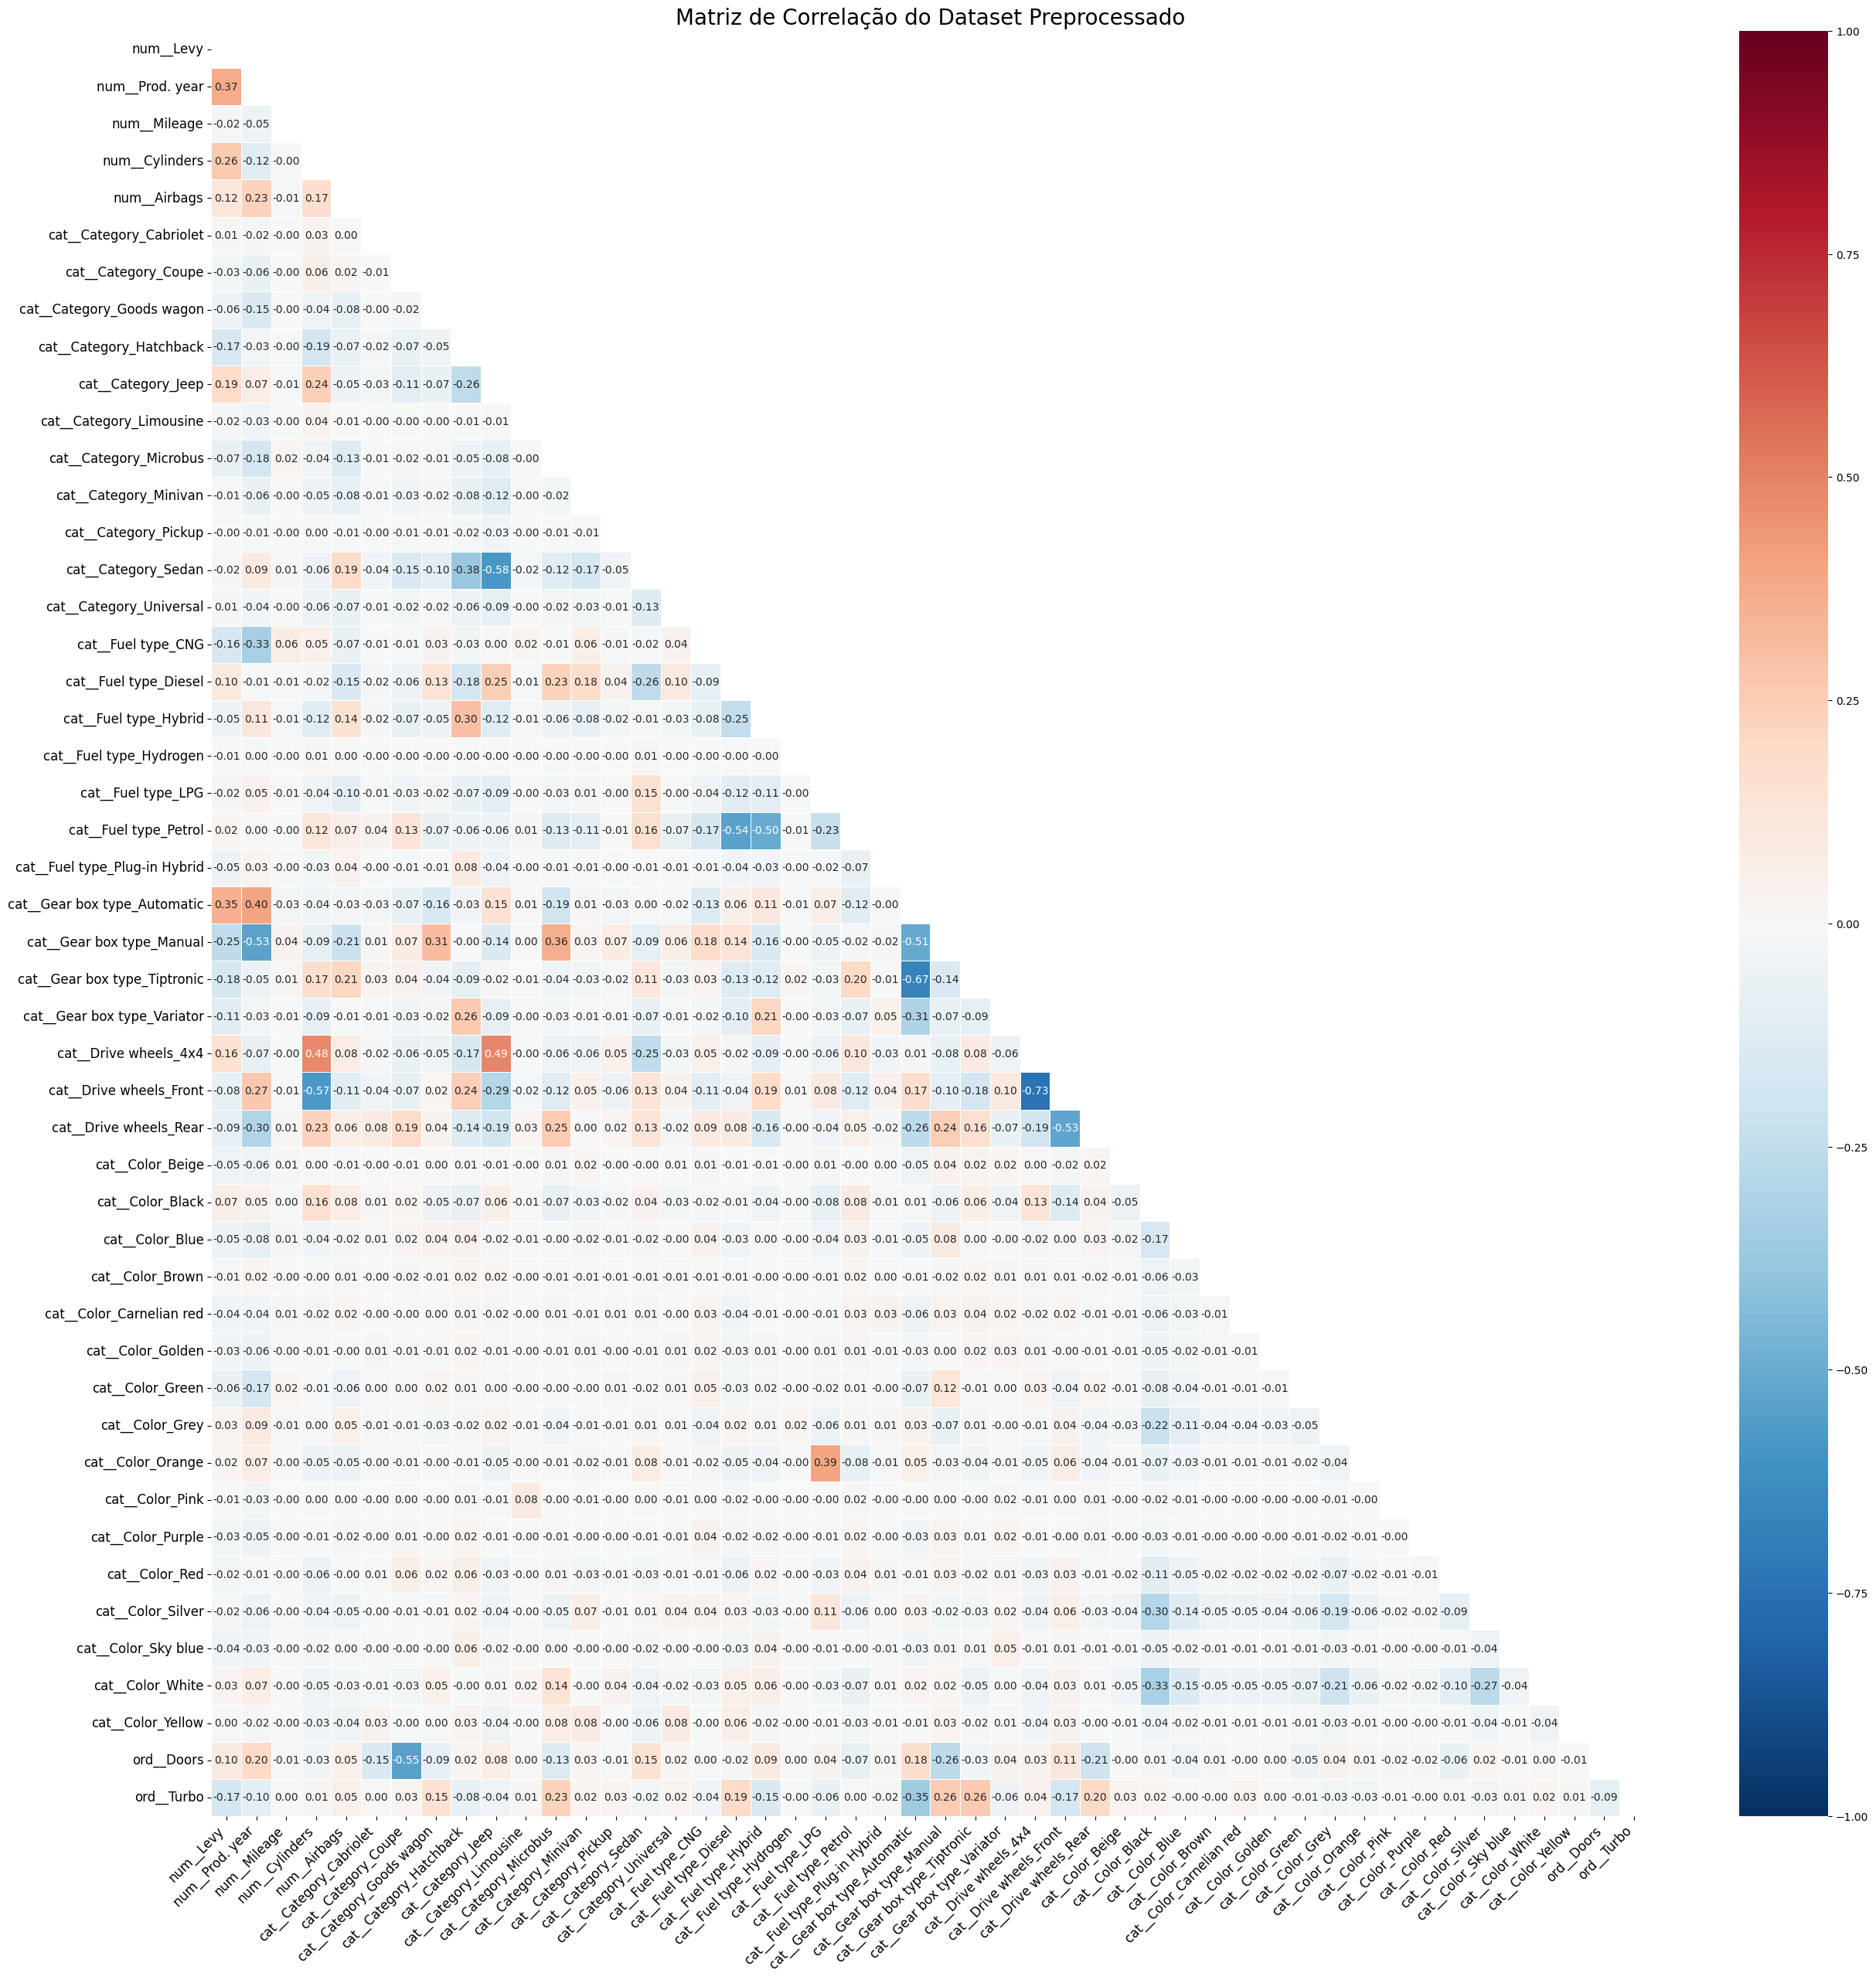

In [ ]:
# Criar uma máscara para ocultar a parte superior da matriz de correlação
mask = np.triu(np.ones_like(strat_train_set_prepared_df.corr(), dtype=bool))

plt.figure(figsize=(30, 30))

# Plotar a matriz de correlação
sns.heatmap(
    strat_train_set_prepared_df.corr(),
    mask=mask,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='RdBu_r',
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 10}
)

# Configurar título e rótulos
plt.title('Matriz de Correlação do Dataset Preprocessado', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.show()


Porém, a correlação é uma boa métrica para relacionamento linear, mas não destaca os não lineares. Para isso, usamos informações mútuas, por isso usamos a Medição de Informação Mútua (MI) que ajuda a identificar quais variáveis independentes (features) têm maior relevância ou dependência com a variável dependente (target). Isso é útil para seleção de features, onde queremos escolher as variáveis mais informativas para o modelo. podendo ela capturar tanto relações lineares quanto não lineares entre as variáveis.

Para interpretá-la:

A MI é sempre não negativa e varia de 0 a ∞.
MI = 0: Indica que não há dependência entre a feature e o target. A feature não fornece nenhuma informação sobre o target.
MI > 0: Indica que há alguma dependência entre a feature e o target. Quanto maior o valor, maior a dependência.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Função para calcular a Medição de Informação Mútua (MI)
def make_mi_scores(X, y):
    # Fazer uma cópia para evitar alterações no dataset original
    X = X.copy()

    # Transformar colunas categóricas em numéricas usando factorize()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    # Criar uma lista booleana para identificar os atributos discretos
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]

    # Calcular os scores de Informação Mútua
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)

    # Transformar os scores em uma série do pandas
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

# Criar uma cópia do dataset preprocessado e definir a variável alvo (preço)
X = df_preprocessed.copy()
y = X.pop("Price")  # Remover "Price" do conjunto de features e usá-lo como target

# Calcular os MI Scores
mi_scores = make_mi_scores(X, y)

# Exibir os scores ordenados
print(mi_scores.sort_values(ascending=False))


price_category      1.431599
Model               0.953173
Mileage             0.904661
Levy                0.850806
Airbags             0.455723
Prod. year          0.425425
Manufacturer        0.407132
Engine volume       0.377807
Fuel type           0.221161
Gear box type       0.201598
Category            0.169512
Leather interior    0.149517
Drive wheels        0.124757
Color               0.122966
Cylinders           0.105691
Wheel               0.065381
Turbo               0.051165
Doors               0.014662
Name: MI Scores, dtype: float64


# **Análise das Features Mais Informativas na Predição de Preço de Carros Usados**

## **Features Mais Informativas:**
- **price_category (1.431599):** A categorização do preço é a variável mais informativa, mostrando uma forte relação com o valor final dos veículos.
- **Model (0.953173):** O modelo do carro tem uma grande influência no preço, pois diferentes modelos da mesma marca podem apresentar grande variação de valor.
- **Mileage (0.904661):** A quilometragem rodada pelo veículo tem um impacto direto no preço, com carros menos rodados geralmente sendo mais valorizados.
- **Levy (0.850806):** A taxa associada ao veículo também apresenta uma alta correlação, possivelmente refletindo custos extras que impactam o preço final.
- **Airbags (0.455723):** A presença de airbags afeta o valor do carro, pois veículos com mais recursos de segurança tendem a ser mais valorizados.

## **Features Moderadamente Informativas:**
- **Prod. year (0.425425):** O ano de fabricação influencia o preço, pois veículos mais novos geralmente custam mais.
- **Manufacturer (0.407132):** A marca do carro tem um impacto considerável, pois algumas são mais valorizadas no mercado de revenda.
- **Engine volume (0.377807):** O volume do motor tem uma influência relevante, com motores maiores e mais potentes geralmente elevando o preço do veículo.
- **Fuel type (0.221161):** O tipo de combustível afeta o preço, pois carros elétricos e híbridos costumam ser mais caros que os convencionais a gasolina ou diesel.
- **Gear box type (0.201598):** O tipo de câmbio também tem um impacto moderado, com veículos automáticos geralmente mais valorizados.

## **Features Menos Informativas:**
- **Category (0.169512):** A categoria do veículo (SUV, Sedan, Hatchback, etc.) influencia o preço, mas em menor grau.
- **Leather interior (0.149517):** A presença de interior de couro tem uma influência menor sobre o preço do carro.
- **Drive wheels (0.124757):** O tipo de tração (dianteira, traseira, 4x4) tem um impacto pequeno no valor do veículo.
- **Color (0.122966):** A cor do veículo tem pouca influência no preço final, embora algumas cores sejam mais populares.
- **Cylinders (0.105691):** O número de cilindros do motor apresenta uma baixa relação com o preço do veículo.
- **Wheel (0.065381):** A posição do volante (esquerda/direita) tem pouca ou nenhuma influência no preço.
- **Turbo (0.051165):** A presença de turbo no motor tem um impacto mínimo no preço final do carro.
- **Doors (0.014662):** O número de portas do veículo é a variável menos informativa, sem relação significativa com o preço.



In [ ]:
# Selecionar as top 10 features mais informativas
top_10_features = mi_scores.head(10)
print("Top 10 features mais informativas:\n", top_10_features)

# Filtrar o DataFrame original para incluir apenas essas features
selected_features = top_10_features.index
X_selected = X[selected_features]

Top 10 features mais informativas:
 price_category    1.431599
Model             0.953173
Mileage           0.904661
Levy              0.850806
Airbags           0.455723
Prod. year        0.425425
Manufacturer      0.407132
Engine volume     0.377807
Fuel type         0.221161
Gear box type     0.201598
Name: MI Scores, dtype: float64


## Pré-seleção de modelos

In [ ]:
# Importar bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Selecionar os modelos para a predição de preços de carros usados
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Exibir os modelos selecionados
print("Modelos Selecionados para Predição de Preços de Carros Usados:")
for name in models.keys():
    print("-", name)


Modelos Selecionados para Predição de Preços de Carros Usados:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- K-Neighbors Regressor


# **Modelos Selecionados para a Predição de Preços de Carros Usados**

## **Linear Regression**
A **Regressão Linear** é um modelo estatístico que assume uma relação linear entre a variável dependente (preço do carro) e as variáveis independentes (features). A função de custo minimiza a soma dos quadrados dos erros, ajustando uma linha reta para prever os valores. É um modelo **simples e interpretável**, útil como baseline, mas pode não capturar relações **não lineares** entre os atributos.

## **Decision Tree Regressor**
O **Decision Tree Regressor** é um modelo baseado em árvore de decisão que divide os dados em **subconjuntos hierárquicos**, criando regras de decisão para prever o preço do carro. Ele seleciona os atributos que melhor segmentam os dados, usando métricas como variância reduzida. Esse modelo é eficiente para capturar **relações não lineares**, mas pode sofrer **overfitting** se a árvore for muito profunda.

## **Random Forest Regressor**
O **Random Forest Regressor** é um conjunto de múltiplas árvores de decisão treinadas de forma independente em amostras diferentes do dataset. Cada árvore faz uma previsão, e o resultado final é a média das previsões individuais. Esse método ajuda a **reduzir o overfitting** e melhora a **precisão** do modelo, tornando-o mais robusto. É uma ótima escolha para regressão em **dados tabulares** como os de preços de carros usados.

## **Gradient Boosting Regressor**
O **Gradient Boosting Regressor** é um modelo que cria árvores de decisão de forma sequencial, corrigindo os erros das árvores anteriores. Ele **prioriza os erros das previsões anteriores**, ajustando o modelo de forma mais precisa a cada iteração. Apesar de ser mais **lento para treinar**, esse método geralmente fornece **ótimos resultados em predição** e pode superar o Random Forest em alguns cenários.

## **K-Nearest Neighbors Regressor (KNN Regressor)**
O **KNN Regressor** é um modelo baseado na proximidade entre os dados. Para prever o preço de um carro, ele encontra os **K veículos mais semelhantes** no conjunto de treinamento e calcula a média dos seus preços. O desempenho do modelo depende da escolha de **K** e da forma como a distância é calculada. É um modelo **simples**, mas pode ser **computacionalmente custoso** para grandes volumes de dados e **sensível a atributos irrelevantes**.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definir as features e a variável alvo corretamente
X = strat_train_set_prepared_df  # As features transformadas
y = df_preprocessed["Price"]  # A variável alvo original

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar DataFrames para os conjuntos de treino e teste sem PCA
X_train_sem_pca = pd.DataFrame(X_train, columns=X.columns)
X_test_sem_pca = pd.DataFrame(X_test, columns=X.columns)

# Aplicação do PCA para redução de dimensionalidade
pca = PCA(n_components=0.95)  # Mantém 95% da variância
X_train_com_pca = pca.fit_transform(X_train)
X_test_com_pca = pca.transform(X_test)

# Converter os arrays transformados de volta para DataFrames
X_train_com_pca = pd.DataFrame(X_train_com_pca)
X_test_com_pca = pd.DataFrame(X_test_com_pca)

# Exibir o tamanho dos conjuntos
print("Formato dos Conjuntos de Treinamento e Teste:")
print("X_train_sem_pca:", X_train_sem_pca.shape, "X_test_sem_pca:", X_test_sem_pca.shape)
print("X_train_com_pca:", X_train_com_pca.shape, "X_test_com_pca:", X_test_com_pca.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Imprimir os nomes das colunas do DataFrame de treino e teste sem PCA
print("Colunas do X_train_sem_pca:", X_train_sem_pca.columns.tolist())
print("Colunas do X_test_sem_pca:", X_test_sem_pca.columns.tolist())

# Exibir as primeiras linhas de y_train e y_test para verificar a estrutura
print("Amostra de y_train:")
print(y_train.head())

print("Amostra de y_test:")
print(y_test.head())

# Definir os modelos incluindo o PCA no pipeline
models = {
    "Linear Regression": Pipeline(steps=[('pca', pca), ('model', LinearRegression())]),
    "Decision Tree Regressor": Pipeline(steps=[('pca', pca), ('model', DecisionTreeRegressor(random_state=42))]),
    "Random Forest Regressor": Pipeline(steps=[('pca', pca), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "Gradient Boosting Regressor": Pipeline(steps=[('pca', pca), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))]),
    "K-Neighbors Regressor": Pipeline(steps=[('pca', pca), ('model', KNeighborsRegressor(n_neighbors=5))])
}

# Definir as métricas de desempenho
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Definir diferentes valores para o número de folds
folds = [3, 5]

# Exibir os modelos definidos com PCA
print("Modelos definidos para treinamento com PCA:")
for nome, modelo in models.items():
    print("-", nome)


Formato dos Conjuntos de Treinamento e Teste:
X_train_sem_pca: (14910, 48) X_test_sem_pca: (3728, 48)
X_train_com_pca: (14910, 19) X_test_com_pca: (3728, 19)
y_train: (14910,) y_test: (3728,)
Colunas do X_train_sem_pca: ['num__Levy', 'num__Prod. year', 'num__Mileage', 'num__Cylinders', 'num__Airbags', 'cat__Category_Cabriolet', 'cat__Category_Coupe', 'cat__Category_Goods wagon', 'cat__Category_Hatchback', 'cat__Category_Jeep', 'cat__Category_Limousine', 'cat__Category_Microbus', 'cat__Category_Minivan', 'cat__Category_Pickup', 'cat__Category_Sedan', 'cat__Category_Universal', 'cat__Fuel type_CNG', 'cat__Fuel type_Diesel', 'cat__Fuel type_Hybrid', 'cat__Fuel type_Hydrogen', 'cat__Fuel type_LPG', 'cat__Fuel type_Petrol', 'cat__Fuel type_Plug-in Hybrid', 'cat__Gear box type_Automatic', 'cat__Gear box type_Manual', 'cat__Gear box type_Tiptronic', 'cat__Gear box type_Variator', 'cat__Drive wheels_4x4', 'cat__Drive wheels_Front', 'cat__Drive wheels_Rear', 'cat__Color_Beige', 'cat__Color_Blac

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate

# Dicionário para armazenar os conjuntos sem e com PCA
datasets = {
    "Sem PCA": X_train_sem_pca,
    "Com PCA": X_train_com_pca
}

# Função auxiliar para extrair a importância das features corretamente do Pipeline
def get_feature_importance(pipeline):
    # Extrair o modelo real de dentro do Pipeline
    model = pipeline.named_steps["model"]

    if hasattr(model, "coef_") and model.coef_ is not None:  # Modelos lineares (ex.: Regressão Linear)
        return np.abs(model.coef_)
    elif hasattr(model, "feature_importances_"):  # Modelos baseados em árvores
        return model.feature_importances_
    else:
        return None  # Modelos como KNN não possuem importância de features

# Loop para gerar a importância das features para os modelos sem e com PCA
for tipo_pca, X_treino in datasets.items():
    print(f"\n📊 Importância das Features - Modelos {tipo_pca}")

    for nome_modelo, pipeline in models.items():
        print(f"\nAvaliando o modelo: {nome_modelo} ({tipo_pca})")

        # Avaliação do modelo com validação cruzada
        scores = cross_validate(pipeline, X_treino, y_train, scoring=scorers, cv=3, return_estimator=True)

        # Coletar a importância das features (média entre os estimadores)
        feature_importances = [get_feature_importance(estimator) for estimator in scores["estimator"]]
        feature_importances = [imp for imp in feature_importances if imp is not None]  # Remover valores None

        # Se o modelo não possuir feature importance, ignoramos
        if not feature_importances:
            print(f"⚠️ {nome_modelo} não possui coeficientes de importância de features para exibição.")
            continue

        # Calcular a média das importâncias das features
        features_mean = np.mean(feature_importances, axis=0)

        # Se estivermos trabalhando com PCA, os nomes das features serão diferentes (componentes principais)
        if tipo_pca == "Sem PCA":
            feature_names = np.array(X_train_sem_pca.columns)
        else:
            feature_names = [f"PC{i+1}" for i in range(X_treino.shape[1])]

        # Ordenar as features por importância
        sorted_idx = np.argsort(features_mean)[::-1]  # Ordenar da mais importante para a menos importante

        # Exibir os resultados textualmente
        print(f"\n📌 Importância das Features - {nome_modelo} ({tipo_pca}):")
        for idx in sorted_idx:
            print(f"   {feature_names[idx]}: {features_mean[idx]:.6f}")



📊 Importância das Features - Modelos Sem PCA

Avaliando o modelo: Linear Regression (Sem PCA)

📌 Importância das Features - Linear Regression (Sem PCA):
   cat__Category_Goods wagon: 8663.897488
   num__Airbags: 6574.987697
   cat__Category_Coupe: 4723.220924
   cat__Category_Minivan: 4357.272278
   cat__Category_Limousine: 3852.410732
   cat__Category_Universal: 3242.769638
   num__Cylinders: 2110.762745
   cat__Category_Jeep: 1449.670042
   num__Levy: 1439.210740
   cat__Fuel type_Hybrid: 1343.409286
   cat__Category_Cabriolet: 1295.508086
   num__Prod. year: 1277.664802
   num__Mileage: 1047.680226
   cat__Category_Microbus: 924.087733
   cat__Category_Hatchback: 728.068204
   cat__Fuel type_Diesel: 671.858590
   cat__Category_Sedan: 361.742173
   cat__Category_Pickup: 319.834760
   cat__Fuel type_CNG: 210.739295

Avaliando o modelo: Decision Tree Regressor (Sem PCA)

📌 Importância das Features - Decision Tree Regressor (Sem PCA):
   num__Airbags: 0.182349
   num__Levy: 0.129833
  

## Função que avalia os modelos junto com validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def avaliar_modelo(modelo, X_train, y_train, folds):
    resultados = {}
    for fold in folds:
        print(f"Avaliando com {fold} folds...")  # Apenas a mensagem essencial

        resultados[fold] = {}

        try:
            kf = KFold(n_splits=fold, shuffle=True, random_state=42)
            mae_scores = []
            rmse_scores = []
            r2_scores = []

            for train_index, test_index in kf.split(X_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                modelo.fit(X_train_fold, y_train_fold)
                y_pred_fold = modelo.predict(X_test_fold)

                mae_scores.append(mean_absolute_error(y_test_fold, y_pred_fold))
                mse = mean_squared_error(y_test_fold, y_pred_fold)
                rmse_scores.append(np.sqrt(mse))
                r2_scores.append(r2_score(y_test_fold, y_pred_fold))

        except Exception as e:
            print(f"Erro na validação cruzada: {e}")
            continue

        resultados[fold]["MAE"] = {
            "mean_score": np.mean(mae_scores),
            "std_score": np.std(mae_scores)
        }
        resultados[fold]["RMSE"] = {
            "mean_score": np.mean(rmse_scores),
            "std_score": np.std(rmse_scores)
        }
        resultados[fold]["R2"] = {
            "mean_score": np.mean(r2_scores),
            "std_score": np.std(r2_scores)
        }

    return resultados


## Treinando modelos e avaliando os resultados

In [ ]:
# Criar dicionário para armazenar os resultados
resultados_iniciais = {}

# Conjuntos de treino com e sem PCA
datasets = {
    "Sem PCA": X_train_sem_pca,
    "Com PCA": X_train_com_pca
}

# Loop para treinar e avaliar cada modelo
for tipo_pca, X_treino in datasets.items():
    print(f"\n🔍 Treinando modelos {tipo_pca}")

    for nome_modelo, modelo in models.items():
        print(f"\nTreinando e avaliando modelo: {nome_modelo} ({tipo_pca})")

        for fold in folds:
            print(f"  Avaliando com {fold} folds...")

            # Ajustar o modelo com os dados de treino
            modelo.fit(X_treino, y_train)

            # Avaliar o modelo com o número específico de folds
            resultados = avaliar_modelo(modelo, X_treino, y_train, [fold])

            # Armazenar os resultados no dicionário
            if nome_modelo not in resultados_iniciais:
                resultados_iniciais[nome_modelo] = {}

            if tipo_pca not in resultados_iniciais[nome_modelo]:
                resultados_iniciais[nome_modelo][tipo_pca] = {}

            resultados_iniciais[nome_modelo][tipo_pca][fold] = resultados[fold]

        print(f"{nome_modelo} ({tipo_pca}) concluído.\n{'-'*50}")

# Exibir os resultados finais comparando modelos com e sem PCA
print("\n📊 Resultados Iniciais")
for nome_modelo, resultados_pca in resultados_iniciais.items():
    print(f"\n🔹 Resultados para {nome_modelo}:")
    for tipo_pca, resultados in resultados_pca.items():
        print(f"  📌 {tipo_pca}:")
        for cv, metricas in resultados.items():
            print(f"    {cv} folds:")
            print(f"      MAE:  {abs(metricas['MAE']['mean_score']):.4f} ± {metricas['MAE']['std_score']:.4f}")
            print(f"      RMSE: {abs(metricas['RMSE']['mean_score']):.4f} ± {metricas['RMSE']['std_score']:.4f}")
            print(f"      R²:   {metricas['R2']['mean_score']:.4f} ± {metricas['R2']['std_score']:.4f}")



🔍 Treinando modelos Sem PCA

Treinando e avaliando modelo: Linear Regression (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Linear Regression (Sem PCA) concluído.
--------------------------------------------------

Treinando e avaliando modelo: Decision Tree Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Decision Tree Regressor (Sem PCA) concluído.
--------------------------------------------------

Treinando e avaliando modelo: Random Forest Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Random Forest Regressor (Sem PCA) concluído.
--------------------------------------------------

Treinando e avaliando modelo: Gradient Boosting Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Gradient Boosti

## Resultados

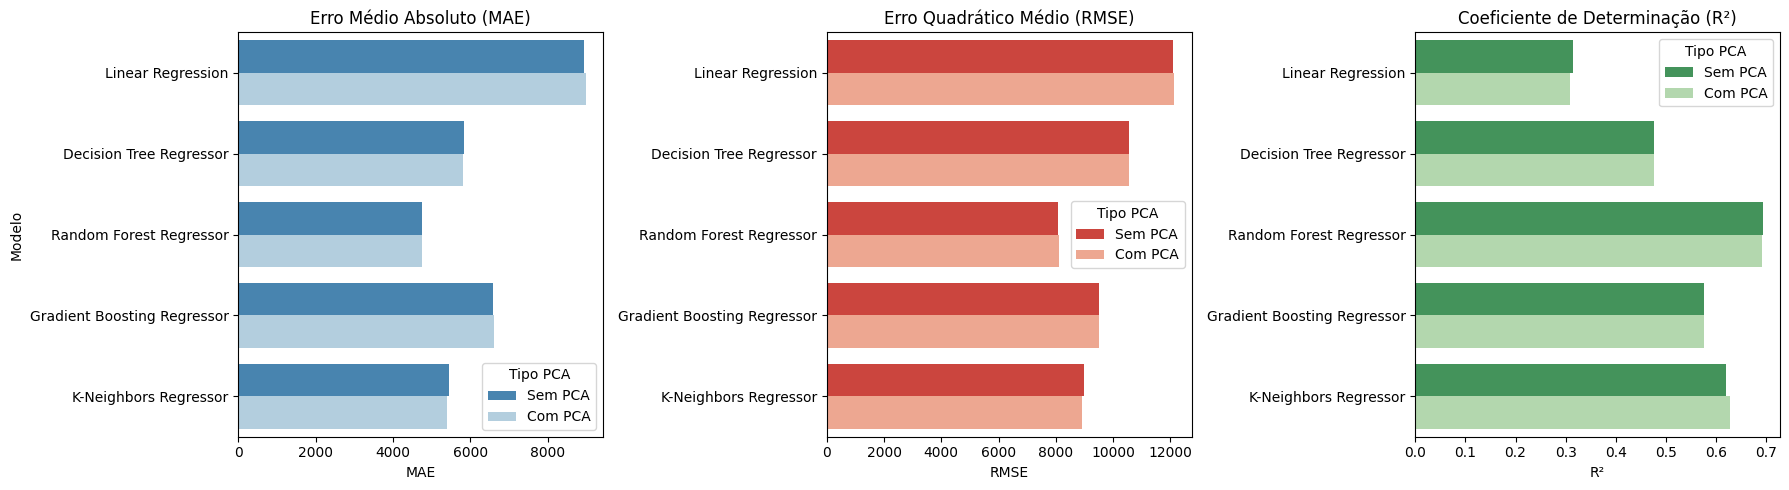

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar listas para armazenar os resultados
modelos = []
tipos_pca = []
mae_scores = []
rmse_scores_list = []
r2_scores = []

# Preencher os dados das métricas para modelos com e sem PCA
for nome_modelo, resultados_pca in resultados_iniciais.items():
    for tipo_pca, resultados in resultados_pca.items():
        modelos.append(nome_modelo)
        tipos_pca.append(tipo_pca)  # "Com PCA" ou "Sem PCA"
        mae_scores.append(abs(resultados[3]["MAE"]["mean_score"]))  # Pegando os resultados de 3 folds
        rmse_scores_list.append(resultados[3]["RMSE"]["mean_score"])
        r2_scores.append(resultados[3]["R2"]["mean_score"])

# Criar DataFrame para visualização
df_resultados = pd.DataFrame({
    "Modelo": modelos,
    "Tipo PCA": tipos_pca,
    "MAE": mae_scores,
    "RMSE": rmse_scores_list,
    "R²": r2_scores
})

# Configurar tamanho da figura
plt.figure(figsize=(18, 5))

# Gráfico de MAE
plt.subplot(1, 3, 1)
sns.barplot(x="MAE", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Blues_r")
plt.title("Erro Médio Absoluto (MAE)")
plt.xlabel("MAE")
plt.ylabel("Modelo")

# Gráfico de RMSE
plt.subplot(1, 3, 2)
sns.barplot(x="RMSE", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Reds_r")
plt.title("Erro Quadrático Médio (RMSE)")
plt.xlabel("RMSE")
plt.ylabel("")

# Gráfico de R² Score
plt.subplot(1, 3, 3)
sns.barplot(x="R²", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Greens_r")
plt.title("Coeficiente de Determinação (R²)")
plt.xlabel("R²")
plt.ylabel("")

plt.tight_layout()
plt.show()


## Avaliação do Desempenho dos Modelos

Para avaliar o desempenho dos modelos de Machine Learning na predição de preços de carros usados, consideramos os seguintes critérios:

- **MAE (Erro Médio Absoluto)** e **RMSE (Raiz do Erro Quadrático Médio)**: Quanto menores, melhor, pois indicam que os valores previstos estão mais próximos dos valores reais.
- **R² (Coeficiente de Determinação)**: Mede o quão bem o modelo explica a variabilidade dos dados. Quanto mais próximo de 1, melhor.

A seguir, apresentamos os resultados da avaliação:

| Modelo                      | MAE       | RMSE      | R²     |
|-----------------------------|----------|----------|--------|
| **Linear Regression**       | 8921.49  | 12086.17 | 0.3142 |
| **Decision Tree Regressor** | 5804.15  | 10611.70 | 0.4706 |
| **Random Forest Regressor** | **4672.86** | **7998.08** | **0.6996** |
| **Gradient Boosting Regressor** | 6556.33  | 9404.26  | 0.5847 |
| **K-Neighbors Regressor**   | 5298.80  | 8842.38  | 0.6328 |

### **Ordem Crescente de Desempenho (Melhor para Pior):**

1. **Random Forest Regressor** → Melhor desempenho geral, apresentando o menor erro (MAE e RMSE) e o maior R², o que indica alta precisão nas previsões.  
2. **K-Neighbors Regressor** → Segunda melhor opção, com desempenho equilibrado entre erro e explicabilidade.  
3. **Gradient Boosting Regressor** → Terceiro melhor modelo, com bons resultados, mas levemente inferior ao KNN.  
4. **Decision Tree Regressor** → Embora tenha um erro MAE menor que o Gradient Boosting, seu RMSE é maior, indicando menor estabilidade.  
5. **Linear Regression** → Pior desempenho, com maior erro e menor R², sugerindo que não captura bem as relações nos dados.  


## *Otimização de Modelos com Random Search*

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

# Ajustando os hiperparâmetros individualmente para cada modelo com PCA
parametros = {
    "Random Forest Regressor (Com PCA)": {
        'model__n_estimators': [150, 200, 250],
        'model__max_depth': [20, 25],
        'model__min_samples_split': [2, 5, 10]  # Evita overfitting
    },
    "K-Neighbors Regressor (Com PCA)": {
        'model__n_neighbors': [5, 7, 9],  # Testando valores maiores
        'model__metric': ['euclidean']  # Mantendo apenas a métrica euclidiana
    },
    "Gradient Boosting Regressor (Com PCA)": {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.03, 0.05, 0.07, 0.1],
        'model__max_depth': [4, 5, 6],
        'model__subsample': [0.8, 1.0]  # Regularização com subsample
    }
}

# Função para otimizar os modelos com PCA usando RandomizedSearchCV
def otimizar_modelo_com_randomsearch(modelo, parametros, X_train, y_train, folds=3, n_iter=5):
    print(f"Otimização para {modelo.__class__.__name__} com {folds} folds usando RandomizedSearchCV")
    print('-' * 50)

    random_search = RandomizedSearchCV(
        estimator=modelo,
        param_distributions=parametros,
        n_iter=n_iter,
        cv=folds,
        scoring=scorers,
        refit="R2",  # O modelo será ajustado com base no melhor R²
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    return random_search.cv_results_

# Adicionar PCA à lista de modelos
modelos_para_otimizar = {
    "Random Forest Regressor (Com PCA)": models["Random Forest Regressor"],  # Com PCA
    "K-Neighbors Regressor (Com PCA)": models["K-Neighbors Regressor"],  # Com PCA
    "Gradient Boosting Regressor (Com PCA)": models["Gradient Boosting Regressor"]  # Com PCA
}

# Rodar a otimização para cada modelo, agora com PCA
resultados_otimizados = {}
for nome, modelo in modelos_para_otimizar.items():
    print(f"\n🔍 Otimizando hiperparâmetros para: {nome}")

    # Selecionar os dados de treino com PCA
    X_train_usado = X_train_com_pca  # Aqui, X_train_com_pca é o conjunto de treino com PCA aplicado

    # Realizar a otimização
    resultados_otimizados[nome] = otimizar_modelo_com_randomsearch(
        modelo, parametros[nome], X_train_usado, y_train, folds=3, n_iter=5
    )

# Exibir os resultados otimizados corretamente
print("\n📊 Resultados Otimizados")
for nome_modelo, resultados in resultados_otimizados.items():
    print(f"\n📌 Resultados otimizados para {nome_modelo}:")
    for i in range(len(resultados['params'])):
        print(f"  🔹 Parâmetros: {resultados['params'][i]}")
        print(f"    📉 MAE: Média = {abs(resultados['mean_test_MAE'][i]):.4f}, Desvio Padrão = {abs(resultados['std_test_MAE'][i]):.4f}")
        print(f"    📉 RMSE: Média = {abs(resultados['mean_test_RMSE'][i]):.4f}, Desvio Padrão = {abs(resultados['std_test_RMSE'][i]):.4f}")
        print(f"    📈 R²: Média = {resultados['mean_test_R2'][i]:.4f}, Desvio Padrão = {resultados['std_test_R2'][i]:.4f}")



🔍 Otimizando hiperparâmetros para: Random Forest Regressor (Com PCA)
Otimização para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

🔍 Otimizando hiperparâmetros para: K-Neighbors Regressor (Com PCA)
Otimização para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

🔍 Otimizando hiperparâmetros para: Gradient Boosting Regressor (Com PCA)
Otimização para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

📊 Resultados Otimizados

📌 Resultados otimizados para Random Forest Regressor (Com PCA):
  🔹 Parâmetros: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__max_depth': 20}
    📉 MAE: Média = 4743.7610, Desvio Padrão = 84.4891
    📉 RMSE: Média = 8052.8780, Desvio Padrão = 217.9998
    📈 R²: Média = 0.6954, Desvio Padrão = 0.0135
  🔹 Parâmetros: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': 2

## Comparação dos Modelos e Próximos Passos

Após a otimização dos hiperparâmetros com PCA para os três modelos selecionados, podemos observar os seguintes resultados:

### **Comparação de Desempenho:**
- **Random Forest Regressor** foi o modelo com melhor desempenho, alcançando um **R² médio de 0.6961**, o que indica que o modelo consegue explicar uma boa parte da variabilidade do preço dos carros. Com uma média de **MAE de 4743.76**, ele mostrou-se estável e preciso, sendo a opção mais eficaz entre os três.
  
- **Gradient Boosting Regressor** apresentou **R² médio de 0.6531**, um desempenho inferior ao Random Forest, mas ainda assim um dos melhores entre os métodos avaliados. Com um **MAE de 5771.70**, o modelo conseguiu capturar bastante da complexidade dos dados, especialmente quando comparado ao K-Neighbors.

- **K-Neighbors Regressor** apresentou o pior desempenho, com **R² médio de 0.6206**, indicando uma explicação menos eficaz da variabilidade dos dados. Seu **MAE médio** foi o mais alto, sugerindo que ele teve mais dificuldades em prever os preços com precisão, especialmente em dados com maior dispersão.

### **Próximos Passos:**
Com base nesses resultados, decidimos seguir com os **modelos Random Forest Regressor e Gradient Boosting Regressor**, pois ambos mostraram um desempenho consideravelmente bom. Vamos então realizar o **Ensemble de Modelos**, onde testaremos uma abordagem de **ensemble**, combinando os melhores resultados dos modelos Random Forest e Gradient Boosting, para tentar obter uma previsão ainda mais precisa.



## *Ensemble de Modelos: Random Forest, Gradient Boosting e K-Neighbors*

Nesta etapa, combinamos os **modelos Random Forest**, **Gradient Boosting** e **K-Neighbors** em um **ensemble** utilizando o **Voting Regressor**. O objetivo é melhorar a precisão das previsões combinando as saídas dos três modelos, buscando um desempenho geral melhor ao calcular a média das previsões. Após o treinamento do ensemble, vamos avaliar seu desempenho utilizando as métricas **MAE**, **RMSE** e **R²**.


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir os hiperparâmetros otimizados para cada modelo
tuned_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=20, random_state=42)
tuned_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=1.0, random_state=42)
tuned_knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Criar o ensemble com VotingRegressor
ensemble = VotingRegressor(
    estimators=[
        ('rf', tuned_rf),
        ('gb', tuned_gb),
        ('knn', tuned_knn)
    ],
    weights=[2, 1.5, 1]  # Pesos para RF, GB e KNN
)


# Criar pipeline final com PCA e o ensemble
ensemble_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),  # Redução de dimensionalidade
    ('model', ensemble)
])

# Treinar o modelo ensemble com os dados de treino SEM aplicar PCA separadamente
ensemble_pipeline.fit(X_train, y_train)

# Fazer previsões no conjunto de teste diretamente (sem necessidade de transformar com PCA separadamente)
y_pred_ensemble = ensemble_pipeline.predict(X_test)

# Avaliação do modelo ensemble
mae = mean_absolute_error(y_test, y_pred_ensemble)
mse = mean_squared_error(y_test, y_pred_ensemble)  # Removendo squared=False
rmse = np.sqrt(mse)  # Calculando a raiz quadrada manualmente
r2 = r2_score(y_test, y_pred_ensemble)

# Exibir as métricas de desempenho do ensemble
print(f"📊 Desempenho do Modelo Ensemble:")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 R²: {r2:.4f}")



📊 Desempenho do Modelo Ensemble:
📉 MAE: 4923.0068
📉 RMSE: 8018.2278
📈 R²: 0.7124


## *Resultados*

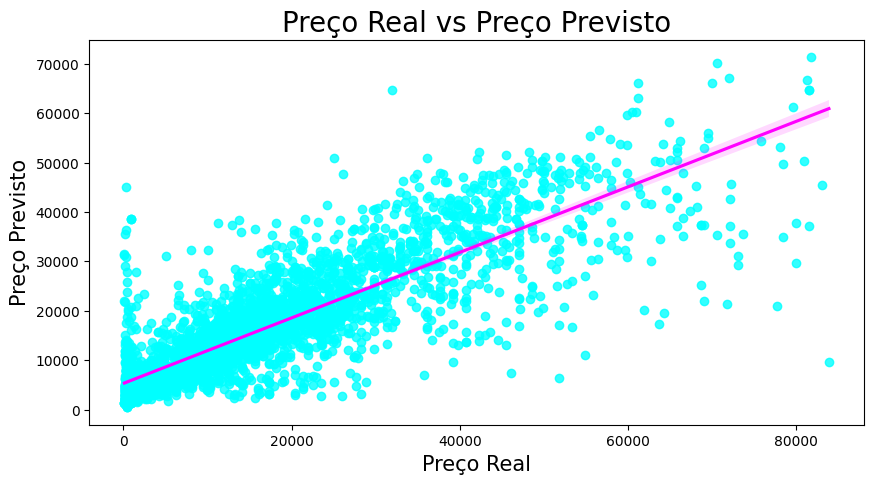

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar DataFrame com valores reais e previstos
out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred_ensemble})

# Gerar gráfico de dispersão (Preço Real vs Preço Previsto)
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=out,
            line_kws={'color': 'magenta'}, scatter_kws={'color': 'cyan'})
plt.title('Preço Real vs Preço Previsto', fontsize=20)
plt.xlabel('Preço Real', fontsize=15)
plt.ylabel('Preço Previsto', fontsize=15)
plt.show()
